<a href="https://colab.research.google.com/github/masayuki038/kaggle-regression-with-abalone-dataset/blob/main/kaggle-regression-with-abalone-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e4:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F72489%2F8096274%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240404%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240404T150044Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6a9aa0bc7fd9ff0364a494a1a6e23006d17d9bf94541bc17d376166d87b9618ae0c55dbd5bccc800798f300dbd20116212d8e6aa2b1c3425c0080dbc60e6afd6efa4dd07ef72bb7bae64e45bc4353a4e8411af30e6c0462a63126fbc1e227dad9389ba9c0bdbe8e9c88332c2a89853574bb637387857b4d60cc9d4aa2bed5bb0314ca5e8282f2964a798c135a4b2bd3d6b6f1fc9b102e4309650c82d45694080d34331ac8f6a80c565ca3651570c1c10d6010c55c78d23f4d520cba968a98242d366dd528e9a0b43e85ed70c70d57728fe151e276482ebf2ecb959e23a35b53b91d55330aebbe1783203e0784b11afbc3814a821647ac0fbf84a82bbe0c6e3ad'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2529839 bytes downloaded
Downloaded and uncompressed: playground-series-s4e4
Data source import complete.


<div style="border-radius: 15px;
            border: 2px solid red;
            color:white;
            font-family: Helvetica;
            text-align: center;
            padding: 20px;
            width: 800px;
            text-align: center;
            background-color: #FF7F7F;
            font-size: 44px;
            text-shadow: 2px 2px 4px #000;">
    Short & Easy Notebook </br>
    to get </br>
    Started
</div>


In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/test.csv


<div style="border-radius: 15px;
            border: 2px solid blue;
            color:white;
            font-family: Helvetica;
            text-align: center;
            padding: 20px;
            width: 800px;
            text-align: center;
            background-color: #ADD8E6;
            font-size: 44px;
            text-shadow: 2px 2px 4px #000;">
    Load Data
</div>


In [22]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

In [23]:
train_data.head().style.background_gradient()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550000,0.430000,0.150000,0.771500,0.328500,0.146500,0.240000,11
1,1,F,0.630000,0.490000,0.145000,1.130000,0.458000,0.276500,0.320000,11
2,2,I,0.160000,0.110000,0.025000,0.021000,0.005500,0.003000,0.005000,6
3,3,M,0.595000,0.475000,0.150000,0.914500,0.375500,0.205500,0.250000,10
4,4,I,0.555000,0.425000,0.130000,0.782000,0.369500,0.160000,0.197500,9


In [24]:
test_data.head().style.background_gradient()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645000,0.475000,0.155000,1.238000,0.618500,0.312500,0.300500
1,90616,M,0.580000,0.460000,0.160000,0.983000,0.478500,0.219500,0.275000
2,90617,M,0.560000,0.420000,0.140000,0.839500,0.352500,0.184500,0.240500
3,90618,M,0.570000,0.490000,0.145000,0.874000,0.352500,0.186500,0.235000
4,90619,I,0.415000,0.325000,0.110000,0.358000,0.157500,0.067000,0.105000


<div style="border-radius: 15px;
            border: 2px solid blue;
            color:white;
            font-family: Helvetica;
            text-align: center;
            padding: 20px;
            width: 800px;
            text-align: center;
            background-color: #ADD8E6;
            font-size: 44px;
            text-shadow: 2px 2px 4px #000;">
    Remove Duplicates & replace null values
</div>

In [25]:
train_data.nunique()

id                90615
Sex                   3
Length              157
Diameter            126
Height               90
Whole weight       3175
Whole weight.1     1799
Whole weight.2      979
Shell weight       1129
Rings                28
dtype: int64

In [26]:
train_data.isnull().sum().sum()

0

In [27]:
test_data.isnull().sum().sum()

0

In [28]:
cols = [col for col in train_data.columns]

for col in cols:
    print(f"dtype of {col}: {train_data[col].dtype}")

dtype of id: int64
dtype of Sex: object
dtype of Length: float64
dtype of Diameter: float64
dtype of Height: float64
dtype of Whole weight: float64
dtype of Whole weight.1: float64
dtype of Whole weight.2: float64
dtype of Shell weight: float64
dtype of Rings: int64


<div style="border-radius: 15px;
            border: 2px solid blue;
            color:white;
            font-family: Helvetica;
            text-align: center;
            padding: 20px;
            width: 800px;
            text-align: center;
            background-color: #ADD8E6;
            font-size: 44px;
            text-shadow: 2px 2px 4px #000;">
    Preprocessing
</div>

In [29]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [30]:
preprocess = ColumnTransformer([
    ('One Hot', OneHotEncoder(handle_unknown = 'ignore'), make_column_selector(dtype_include = 'object')),
    ('Scale', StandardScaler(), make_column_selector(dtype_include = 'float64'))
])

In [31]:
Y_train = train_data['Rings']
X_train = train_data.drop(['id', 'Rings'], axis = 1)

X_test = test_data.drop(['id'], axis = 1)

train_cols = np.array(X_train.columns)
test_cols = np.array(X_test.columns)

In [32]:
preprocess.fit(pd.concat([X_train, X_test]))

X_train = pd.DataFrame(preprocess.transform(X_train))
X_test = pd.DataFrame(preprocess.transform(X_test))

In [33]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.277772,0.288415,0.378761,-0.039214,-0.060964,-0.227315,0.107737
1,1.0,0.0,0.0,0.955892,0.901890,0.247439,0.744160,0.572771,1.061947,0.722876
2,0.0,1.0,0.0,-3.028063,-2.983452,-2.904273,-1.679164,-1.641631,-1.650462,-1.699234
3,0.0,0.0,1.0,0.659215,0.748521,0.378761,0.273261,0.169040,0.357811,0.184629
4,0.0,1.0,0.0,0.320155,0.237292,-0.146525,-0.016270,0.139678,-0.093430,-0.219056


In [34]:
cat_one_hot_cols = np.array(['Sex_F', 'Sex_I', 'Sex_M'])

train_cols = np.concatenate((cat_one_hot_cols, train_cols[1:]), axis = 0)
test_cols = np.concatenate((cat_one_hot_cols, test_cols[1:]), axis = 0)

X_train.columns = train_cols
X_test.columns = test_cols

In [35]:
X_train.head().style.background_gradient()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,1.000000,0.000000,0.000000,0.277772,0.288415,0.378761,-0.039214,-0.060964,-0.227315,0.107737
1,1.000000,0.000000,0.000000,0.955892,0.901890,0.247439,0.744160,0.572771,1.061947,0.722876
2,0.000000,1.000000,0.000000,-3.028063,-2.983452,-2.904273,-1.679164,-1.641631,-1.650462,-1.699234
3,0.000000,0.000000,1.000000,0.659215,0.748521,0.378761,0.273261,0.169040,0.357811,0.184629
4,0.000000,1.000000,0.000000,0.320155,0.237292,-0.146525,-0.016270,0.139678,-0.093430,-0.219056


In [36]:
X_test.head().style.background_gradient()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0.000000,0.000000,1.000000,1.083040,0.748521,0.510082,0.980155,1.358211,1.418973,0.572936
1,0.000000,0.000000,1.000000,0.532067,0.595152,0.641403,0.422943,0.673092,0.496655,0.376860
2,0.000000,0.000000,1.000000,0.362537,0.186169,0.116118,0.109375,0.056485,0.149546,0.111582
3,0.000000,0.000000,1.000000,0.447302,0.901890,0.247439,0.184763,0.056485,0.169381,0.069291
4,0.000000,1.000000,0.000000,-0.866555,-0.785167,-0.671810,-0.942771,-0.897787,-1.015748,-0.930310


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

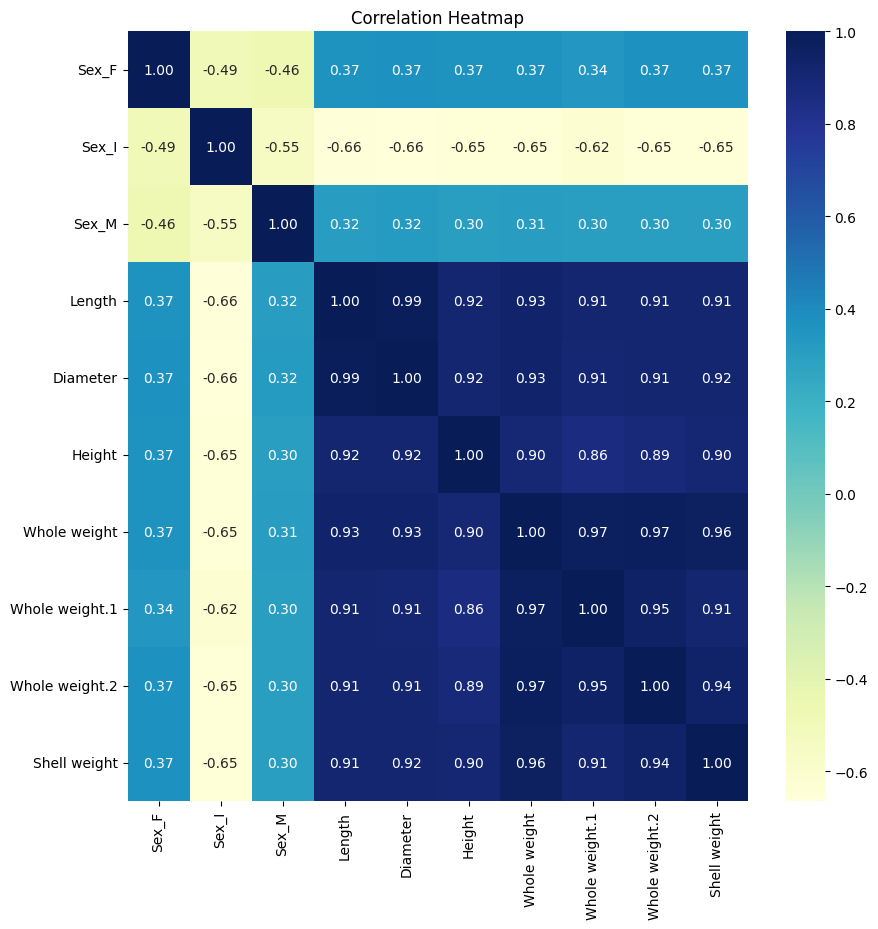

In [41]:
corr = X_train.corr()

plt.figure(figsize = (10, 10), dpi = 100)
sns.heatmap(corr, cmap = 'YlGnBu', fmt = '.2f', annot = True)
plt.title('Correlation Heatmap')
plt.show()

<div style="border-radius: 15px;
            border: 2px solid blue;
            color:white;
            font-family: Helvetica;
            text-align: center;
            padding: 20px;
            width: 800px;
            text-align: center;
            background-color: #ADD8E6;
            font-size: 44px;
            text-shadow: 2px 2px 4px #000;">
    Model training & predictions
</div>

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [43]:
X_train1, X_test1, Y_train1, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

In [44]:
params = {
    'n_estimators': 150,
    'n_jobs': -1,
    'lambda_l1': 0.02,
    'lambda_l2': 0.06,
    'metric': 'rmse',
    'verbose': -1,
    'random_state': 42
}

model = lgb.LGBMRegressor(**params)

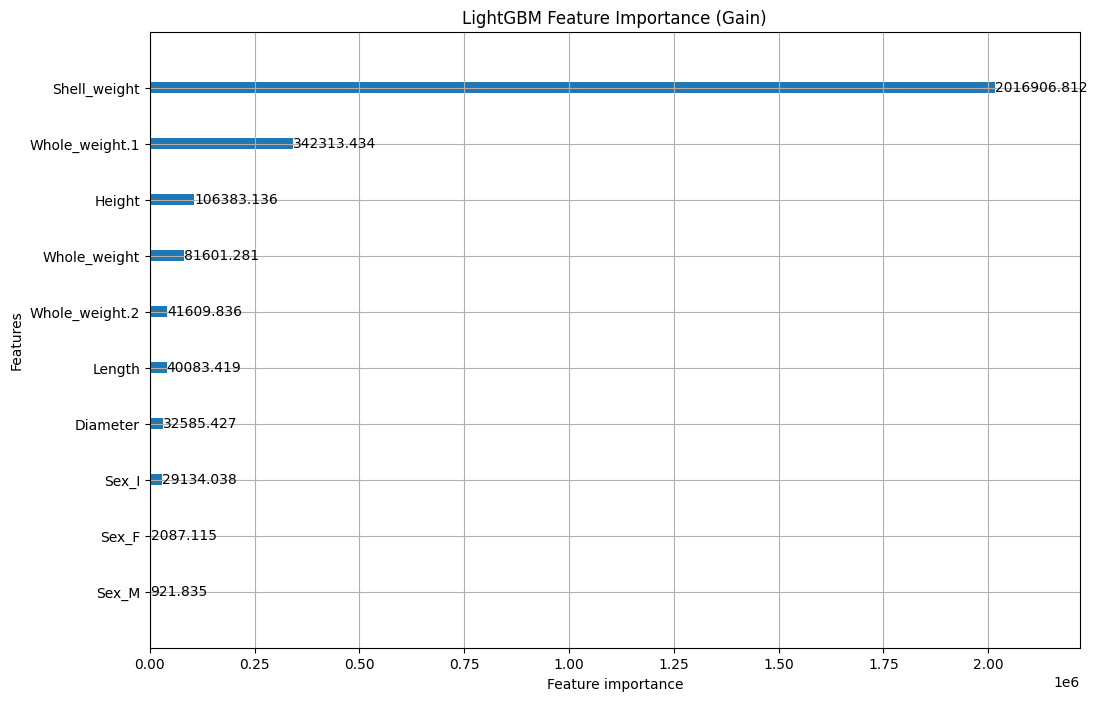

In [45]:
model.fit(X_train1, Y_train1)

lgb.plot_importance(model, importance_type="gain", figsize=(12,8), max_num_features=12,
                    title="LightGBM Feature Importance (Gain)")

plt.show()

In [46]:
preds = model.predict(X_test1)

print(f'RMSLE Score: {np.sqrt(mean_squared_error(np.log1p(preds), np.log1p(Y_test)))}')

RMSLE Score: 0.1521643195857883


In [47]:
preds = model.predict(X_test)

In [48]:
submission = pd.DataFrame({'id': test_data.id, 'Rings': preds})
submission.to_csv('submission.csv', index = False)